In [1]:
using Turing

In [2]:
@model function gdemo(xs) 
    # priors 
    σ² ~ InverseGamma(2 , 3)
    μ ~ Normal(0 , σ²)

    # likelihood
    for i in eachindex(xs)
        xs[i] ~ Normal(μ , σ²)
    end
end

gdemo (generic function with 2 methods)

In [3]:
μ=15; σ = 2.2
data = rand(Normal(μ, σ), 30)

# Construct a model with our data
model = gdemo(data)

DynamicPPL.Model{typeof(gdemo), (:xs,), (), (), Tuple{Vector{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(gdemo, (xs = [13.309726649156765, 13.553578246094347, 14.731067896720257, 13.60631586332967, 17.012429805914316, 15.353019292960898, 15.00442903064877, 16.130716414537833, 16.135046532877823, 15.943293737803012  …  14.571783579012193, 17.163711257276763, 16.117117951381438, 14.765813937623637, 17.78253128066417, 15.845899797450071, 15.586020923121074, 14.501345616809107, 13.45182741554092, 18.0828114007584],), NamedTuple(), DynamicPPL.DefaultContext())

In [4]:
chain = sample(
    model, 
    NUTS(), 
    500 # Number of samples
)

┌ Info: Found initial step size
└   ϵ = 0.00625


Chains MCMC chain (500×14×1 Array{Float64, 3}):

Iterations        = 251:1:750
Number of chains  = 1
Samples per chain = 500
Wall duration     = 4.18 seconds
Compute duration  = 4.18 seconds
parameters        = σ², μ
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std      mcse   ess_bulk   ess_tail      rhat   e ⋯
      Symbol   Float64   Float64   Float64    Float64    Float64   Float64     ⋯

          σ²    3.2340    0.4064    0.0180   496.0125   253.5835    1.0238     ⋯
           μ   14.9500    0.5296    0.0273   400.2457   267.1861    0.9982     ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

          σ² 

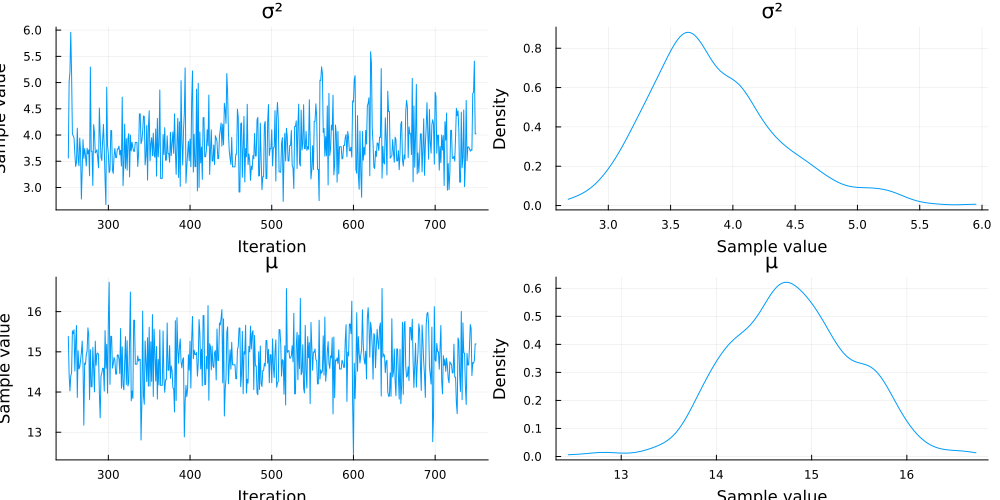

In [17]:
using StatsPlots
plot(chain)